In [1]:
import svgling

# Overview of `svgling`

### Kyle Rawlins, [kgr@jhu.edu](kgr@jhu.edu)

This package is a pure python package for rendering linguistics-style (constituent) trees in SVG. It accepts trees defined in terms of lists of lists (really, anything indexable) and strings, as well as `nltk.Tree` objects (or anything with the same API).

The package has three main design principles, which together make it relatively unique:

1. Be well suited for *programmatic* generation of tree diagrams. This means that, while various tweaks are possible, the default settings with no customization should look decent to good on a very wide range of trees and tree styles.
2. Be equally suited for theoretical linguistics and computational linguistics/NLP, at least for cases where the latter is targeting constituent trees. (This package is not aimed at dependency trees.)
3. Do as much as possible with pure python (as opposed to python+javascript, or python+tk, or python+dot, or...).

The `nltk` interface is described below; the list interface is pretty straightforward from bracketing notation. (In what follows, "list" is used a generic term that covers any indexable structure, including python lists and tuples.) The first element of the list is the label of a parent node, and any subsequent members of the list are daughter nodes. A parent node without a daughter node is a leaf node (as are non-list strings).

For convenient use in Jupyter notebooks, the main function to try is `svgling.draw_tree`:

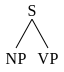

In [2]:
svgling.draw_tree(("S", "NP", "VP"))

As a shortcut, the outer bracketing here can be omitted:

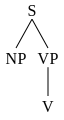

In [3]:
svgling.draw_tree("S", "NP", ("VP", "V"))

Multi-line nodes are generally possible. Simply provide the node as a string that includes `\n` where a linebreak is desired. The next example, a more complex tree with multi-line leaf nodes, also shows how to get the leaf nodes to be lined up with each other. (This tree is from Carnie 2013, *Syntax: a generative introduction (3rd ed.)*, p. 93.)

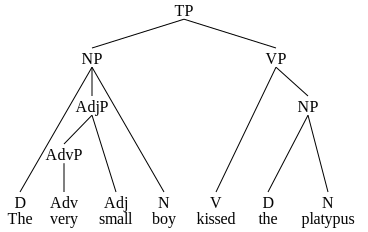

In [4]:
svgling.draw_tree("TP", ("NP", "D\nThe", ("AdjP", ("AdvP", "Adv\nvery"), "Adj\nsmall"), "N\nboy"), ("VP", "V\nkissed", ("NP", "D\nthe", "N\nplatypus")), leaf_nodes_align=True)

Next is an even more complex example, a typical tree for Quantifier Raising in the Heim & Kratzer 1998 ("Semantics in Generative Grammar") style, illustrating movement arrows.

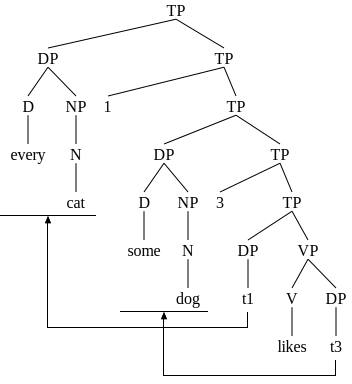

In [5]:
t2 = ("TP", ("DP", ("D", "every"), ("NP", ("N", "cat"))),
           ("TP", "1", ("TP", ("DP", ("D", "some"), ("NP", ("N", "dog"))),
                     ("TP", "3", ("TP", ("DP", "t1"), ("VP", ("V", "likes"), ("DP", "t3")))))))
out = svgling.draw_tree(t2)
out.movement_arrow((1,1,1,1,0), (0,))
out.underline_constituent((0,))
out.movement_arrow((1,1,1,1,1,1), (1,1,0))
out.underline_constituent((1,1,0))
out

## Options

There are various formatting options that can affect how trees are rendered. See the manual for a full list. Because `svgling` does (for now) only single-pass rendering, with no javascript, some of the spacing options may involve a certain amount of heuristic adjustment (because it is impossible to know exact text sizes before actually rendering them to a device). Please let me know if you find spacing bugs and I'll try to address them.

The simplest way to pass options is via named parameters to `draw_tree`.

Here are two somewhat more interesting trees, defined as lists, and various rendering options demonstrated on those trees.

In [6]:
t0 = ("S", ("NP", "D", "N"), ("VP", "V", ("NP", "D", "N")))
t1 = ("S", ("NP", ("D", "the"), ("N", "rhinoceros")), ("VP", ("V", "saw"), ("NP", ("D", "the"), ("N", "elephant"))))

Here are the default settings, which use text-width-based spacing (`HorizOptions.TEXT`):

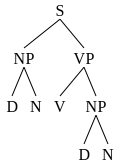

In [7]:
svgling.draw_tree(t0)

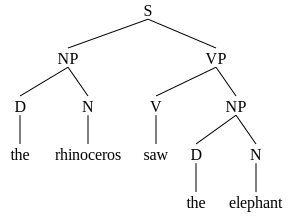

In [8]:
svgling.draw_tree(t1)

Here are the two above trees rendered using even spacing. Without manual adjustment, this may cut off longer words, but it can look better for abstract trees with similar-width leaf nodes.

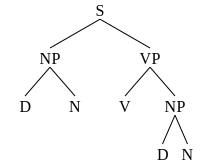

In [9]:
svgling.draw_tree(t0, horiz_spacing=svgling.core.HorizOptions.EVEN, leaf_padding=4)

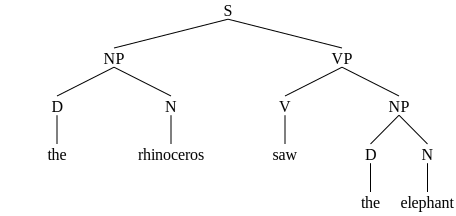

In [10]:
svgling.draw_tree(t1, horiz_spacing=svgling.core.HorizOptions.EVEN, leaf_padding=6)

By default, leaf node height will be determined by the depth of the leaf node. It is possible to set leaf nodes to all align with the lowest leaf node in the tree:

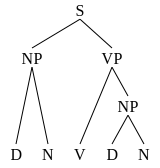

In [11]:
svgling.draw_tree(t0, leaf_nodes_align=True, leaf_padding=3)

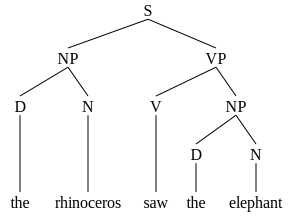

In [12]:
svgling.draw_tree(t1, leaf_nodes_align=True)

Sometimes it is helpful to, in combination with `leaf_nodes_align`, set `descend_direct` to be `False`, which draws the line to leaf nodes in a different way:

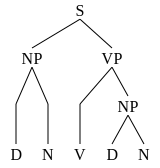

In [13]:
svgling.draw_tree(t0, leaf_nodes_align=True, leaf_padding=3, descend_direct=False)

Vertical spacing can be customized with `distance_to_daughter`, which stores a value in `em`s. Values less than about 0.5 are not recommended and will usually result in rendering problems. Here is an example of an extremely compact tree:

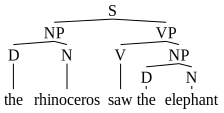

In [14]:
svgling.draw_tree(t1, leaf_nodes_align=True, distance_to_daughter=0.4, leaf_padding=0.2)

## NLTK integration

The `svgling.draw_tree` function can handle nltk.Tree objects (or any object using the same API) transparently. Be warned that complex or multi-line labels won't work very well, though.

In [15]:
import nltk
svgling.disable_nltk_png()
t3 = nltk.Tree.fromstring("(S (NP (D the) (N elephant)) (VP (V saw) (NP (D the) (N rhinoceros))))")

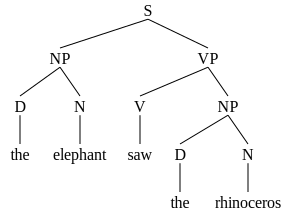

In [16]:
svgling.draw_tree(t3)

n.b. I'm not aware of any way to get `fromstring` to allow multi-line leafs, so if you want to do this in `nltk`, you'll need to construct the tree more directly. (You can supply options for trees drawn this way as usual.)

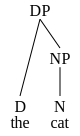

In [17]:
from nltk import Tree
svgling.draw_tree(Tree('DP', ['D\nthe', Tree('NP', ['N\ncat'])]), leaf_nodes_align=True)

For convenience' sake, `svgling` will attempt to monkeypatch `nltk.Tree._repr_svg_` when imported (or reloaded). This means that as long as `svgling` is loaded, nltk trees should by default render using the svg format, overriding the default png-based renderer that is part of `nltk` (and its associated, fairly annoying, dependency on tk). To avoid the png rendering code altogether, you can use `del` to remove the relevant function (illustrated by the first cell in this section).

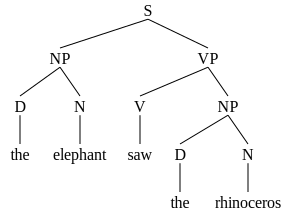

In [18]:
t3

The rendering options for trees rendered this way can be customized via `svgling.core.nltk_tree_options`, though I don't recommend messing with the spacing too much. This object is created as a default `svgling.core.TreeOptions()`, in case you need to reset it.

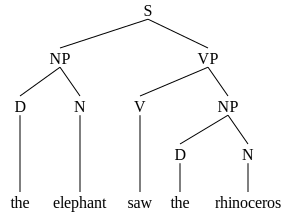

In [19]:
svgling.core.nltk_tree_options.leaf_nodes_align = True
t3

## Other formatting adjustments

If you really want to, you can change the font. By default it will use times with some serif as a backup. To do this supply a css-formatted string; this defaults to `"font-family: times, serif; font-weight:normal; font-style: normal;"`. I recommend supplying all of these values, as otherwise when the tree is embedded in an arbitrary document, context might impact the font choice in unexpected ways. Don't forget the trailing `;`. Keep in mind also that if you are sharing your document with others, this will be dependent on installed fonts for their svg viewer.

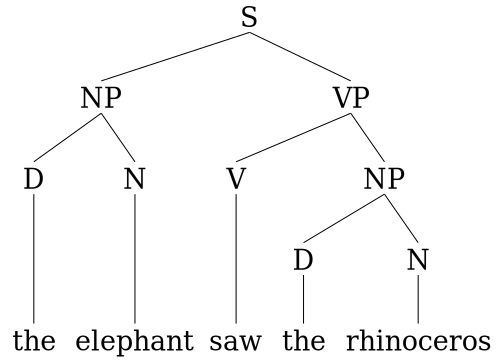

In [20]:
svgling.core.nltk_tree_options.global_font_style = "font-family: georgia, times, serif; font-weight:normal;"
svgling.core.nltk_tree_options.font_size = 27
t3

## Debug mode

Sometimes, if a tree is not rendering how you expect, it may be helpful to view it in debug mode; this draws an `em` grid along with boxes for each subtree to show how it is doing positioning. This is set with the `debug` value on options objects.

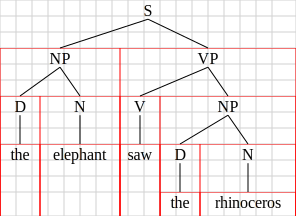

In [21]:
svgling.core.nltk_tree_options = svgling.core.TreeOptions()
svgling.core.nltk_tree_options.debug = True
t3

## Further customization and future directions

Because of the nature of SVG, various aspects of trees are very easy to customize, and various things that would be nice to have are nonetheless extremely hard to do. Even things that aren't exposed in the `svgling` API may be pretty easy to do with some light under-the-hood customization of the tree rendering code. If you have specific requests, let me know.

Things that would be easy, if anyone actually wants them:
* change colors of text, have some nodes be italic/bolded
* other graphical customization of what is currently rendered, SVG is pretty powerful.

Things that might be possible, but not easy:
* labels along edges? SVG has pretty good support for this but I don't (currently) know how to use it, so it might actually be easy.

Things that are quite hard, but desirable (most of these need multi-pass rendering to do right):
* resize trees based on actual node sizes.
* support complex nodes in a more general way.
* put MathJax in nodes, perhaps using SVG `foreignObject`. Support `foreignObject` nodes in general. (This requires being able to calculate node sizes, too.)
* allow positioning of nodes or interactive trees via javascript.
* export to raster format. (Perhaps via inkscape?)
